<a href="https://colab.research.google.com/github/ascl1u/MCSpotter/blob/main/MCSpotter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.kaggle.com/datasets/splcher/animefacedataset
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.12.0


In [ ]:
# data collection
import os
import zipfile
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!kaggle datasets download -d splcher/animefacedataset
zip_path = "/content/animefacedataset.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall('/content/animefaces')

Saving kaggle.json to kaggle.json
animefacedataset.zip: Skipping, found more recently modified local copy (use --force to force download)


Found 63565 files belonging to 1 classes.
Using 50852 files for training.
Found 63565 files belonging to 1 classes.
Using 12713 files for validation.
['images']


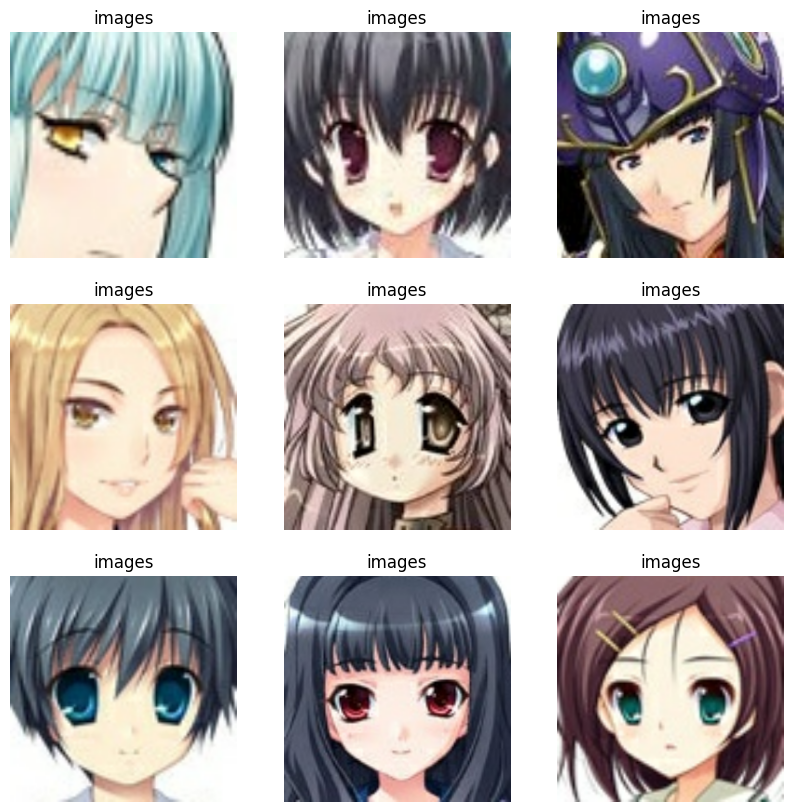

In [ ]:
#data preprocessing

dataset_path = '/content/animefaces'

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (244, 244),
    batch_size = 256
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (244, 244),
    batch_size = 256
)

class_names = train_dataset.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
#model architecture
from tensorflow.keras.layers import Rescaling

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation = 'relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
#model training

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 3
)

Epoch 1/3
 81/199 [===========>..................] - ETA: 26:33 - loss: 0.0071 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.preprocessing import image
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300, 300))
  x = image.img_to_array(img)
  x = x / 255
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is an anime character")
  else:
    print(fn + " is not an anime character")

Saving test1.jpg to test1.jpg


ValueError: ignored